<a href="https://colab.research.google.com/github/a-singh03/DL-NLP/blob/main/Mobile_wt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from  pathlib import Path

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
pathToFolder = "/gdrive/MyDrive/Deep Learning"

In [6]:
path = Path(pathToFolder) / "mobile_price.csv"

In [7]:
mobile_price = pd.read_csv(path)
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
y = mobile_price.pop("mobile_wt")
X = mobile_price

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,18,10,19,1,1,1,0


In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(layers.Input( shape = (20,) ) )

In [11]:
model.add(layers.Dense(500, activation='sigmoid'))

In [12]:
model.add(layers.Dense(800, activation='relu'))

In [13]:
model.add(layers.Dense(1000, activation='sigmoid'))

In [14]:
model.add(layers.Dense(1))

In [15]:
model.compile( loss = "mae")

In [16]:
model.fit(X,y, epochs = 1000 )

Epoch 1/1000
63/63 [==============================] - 2s 21ms/step - loss: 97.3230
Epoch 2/1000
63/63 [==============================] - 1s 20ms/step - loss: 60.6804
Epoch 3/1000
63/63 [==============================] - 1s 21ms/step - loss: 37.6554
Epoch 4/1000
63/63 [==============================] - 2s 32ms/step - loss: 31.1075
Epoch 5/1000
63/63 [==============================] - 2s 31ms/step - loss: 30.7133
Epoch 6/1000
63/63 [==============================] - 1s 21ms/step - loss: 30.7064
Epoch 7/1000
63/63 [==============================] - 1s 19ms/step - loss: 30.7329
Epoch 8/1000
63/63 [==============================] - 1s 20ms/step - loss: 30.7288
Epoch 9/1000
63/63 [==============================] - 1s 20ms/step - loss: 30.7226
Epoch 10/1000
63/63 [==============================] - 1s 19ms/step - loss: 30.7145
Epoch 11/1000
63/63 [==============================] - 1s 20ms/step - loss: 30.7148
Epoch 12/1000
63/63 [==============================] - 1s 20ms/step - loss: 30.7210
E

In [17]:
pred = model.predict(X)

63/63 [==============================] - 0s 6ms/step


In [18]:
pred = np.round(pred)


In [19]:
y.shape

(2000,)

In [20]:
np.sum(pred == y.values.reshape(2000,1))/2000

0.011

In [21]:
from tensorflow.keras.utils import plot_model

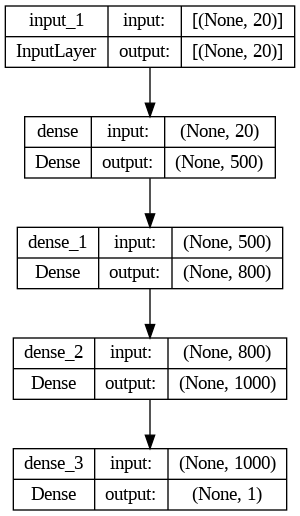

In [22]:
plot_model(model, show_shapes=True)

In [23]:
######### --------Done ---------------